# Dask Integration with pyclespranto

This demo is to illustrate a proper setup of GPU workers with [Dask](https://docs.dask.org/en/stable/) client API.

pyclespranto has a very good integration with Dask. However GPU often has less VRAM than host (CPU) side. It is recommended to setup a separate GPU worker to manage pyclespranto operations.

In [1]:
# Header import with specific computing device. Here we select a GPU for the opencl operations.
import pyclesperanto as cle
cle.select_device()

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.216.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Maximum Object Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Dask Crash Course

To begin with, we create a big random Dask array. This suppose to be capable for a single task run on the 8GB GPU

In [2]:
from dask import array
dask_array = array.random.random((450, 1024,1024))
# dask_array = array.random.random((128, 1024, 1024))
dask_array

dask.array<random_sample, shape=(450, 1024, 1024), dtype=float64, chunksize=(255, 255, 255), chunktype=numpy.ndarray>

Perform Gaussian blur with dask_array on GPU

array([[[6.92047596e-01, 3.58055353e-01, 5.04424632e-01, ...,
         1.09235365e-02, 8.69203031e-01, 7.98786342e-01],
        [6.21374607e-01, 5.47839776e-02, 8.38897109e-01, ...,
         6.64017916e-01, 2.63222307e-01, 3.25918287e-01],
        [7.13996232e-01, 4.94367033e-01, 8.30525637e-01, ...,
         4.49775234e-02, 8.47960055e-01, 3.20917159e-01],
        ...,
        [5.85395753e-01, 5.15856802e-01, 4.23299730e-01, ...,
         5.06894529e-01, 7.92672217e-01, 2.16899559e-01],
        [6.18198574e-01, 5.06905675e-01, 6.06007576e-01, ...,
         4.82770234e-01, 3.44696879e-01, 8.47914934e-01],
        [7.49745011e-01, 6.92625120e-02, 7.74408460e-01, ...,
         1.89185798e-01, 2.84779817e-01, 3.64275724e-02]],

       [[9.21883345e-01, 4.76558685e-01, 3.60380858e-01, ...,
         6.99894071e-01, 4.87322062e-01, 3.41215551e-01],
        [9.20171559e-01, 1.81643784e-01, 1.19537972e-01, ...,
         4.19909000e-01, 4.03002113e-01, 2.08676636e-01],
        [1.80916533e-01, 4.32696640e-01, 8.39981973e-01, ...,
         8.52401674e-01, 5.47162294e-01, 7.35150874e-01],
        ...,
        [5.96141815e-01, 7.81577587e-01, 7.05778301e-02, ...,
         5.72036684e-01, 1.79887470e-02, 1.77345183e-02],
        [8.03906500e-01, 4.17386472e-01, 9.74662960e-01, ...,
         4.69040096e-01, 4.58582014e-01, 3.73959482e-01],
        [7.78191447e-01, 4.56670642e-01, 6.79321945e-01, ...,
         7.86828399e-01, 1.10293049e-02, 7.25790799e-01]],

       [[4.23663795e-01, 3.10660690e-01, 1.03931114e-01, ...,
         5.08323252e-01, 9.88833487e-01, 5.65820754e-01],
        [1.65367290e-01, 9.75338876e-01, 5.99553704e-01, ...,
         3.84155542e-01, 6.93622649e-01, 9.55802500e-01],
        [5.87749124e-01, 3.26809347e-01, 7.64346123e-01, ...,
         8.57096851e-01, 9.57662284e-01, 8.46814394e-01],
        ...,
        [9.14882496e-02, 6.30289093e-02, 7.42038786e-01, ...,
         4.94728535e-01, 2.65387744e-01, 3.29325289e-01],
        [9.30735111e-01, 4.70363081e-01, 6.40632331e-01, ...,
         9.45139766e-01, 9.49296772e-01, 5.88037297e-02],
        [3.10638547e-01, 3.31231147e-01, 3.98243695e-01, ...,
         5.84425986e-01, 1.01451330e-01, 8.19896162e-01]],

       ...,

       [[4.44999963e-01, 6.93211108e-02, 7.39778799e-04, ...,
         6.15645200e-02, 9.53307509e-01, 1.14044517e-01],
        [1.63054198e-01, 4.15481597e-01, 1.65667459e-01, ...,
         1.61476478e-01, 3.01965088e-01, 3.28707635e-01],
        [9.73313510e-01, 5.50347924e-01, 6.16923809e-01, ...,
         2.88368732e-01, 6.78147614e-01, 8.04133415e-01],
        ...,
        [9.40356612e-01, 3.38110507e-01, 9.49168921e-01, ...,
         3.91642541e-01, 2.60114014e-01, 4.09153253e-02],
        [1.34513780e-01, 9.72904146e-01, 3.21072698e-01, ...,
         9.30766582e-01, 3.65798384e-01, 8.76824558e-01],
        [7.22900093e-01, 8.57710361e-01, 1.52351648e-01, ...,
         6.09200180e-01, 6.30609274e-01, 1.32753417e-01]],

       [[8.72928977e-01, 9.22751427e-01, 7.45792866e-01, ...,
         7.50129282e-01, 4.50653225e-01, 3.71995151e-01],
        [6.95170224e-01, 1.48601145e-01, 6.58029318e-01, ...,
         6.28100216e-01, 1.94072127e-01, 2.00818956e-01],
        [9.91856337e-01, 5.00767469e-01, 6.50965691e-01, ...,
         3.07154864e-01, 3.23223859e-01, 4.84081954e-01],
        ...,
        [5.75049460e-01, 7.43379414e-01, 8.02180171e-01, ...,
         2.53542960e-01, 6.97228372e-01, 2.59986222e-02],
        [1.65088072e-01, 6.84385598e-01, 3.42351019e-01, ...,
         9.64069247e-01, 5.50871968e-01, 7.52789378e-01],
        [6.11044347e-01, 4.28997986e-02, 4.69938844e-01, ...,
         5.22116482e-01, 9.49992776e-01, 7.46784151e-01]],

       [[6.21974707e-01, 3.23712558e-01, 2.27863401e-01, ...,
         9.52181637e-01, 8.75565946e-01, 2.20573068e-01],
        [5.18809631e-02, 8.61671150e-01, 3.23406041e-01, ...,
         3.73244554e-01, 6.76459074e-01, 1.34553045e-01],
        [4.21816409e-01, 6.31942391e-01, 7.04772472e-02, ...,
         1
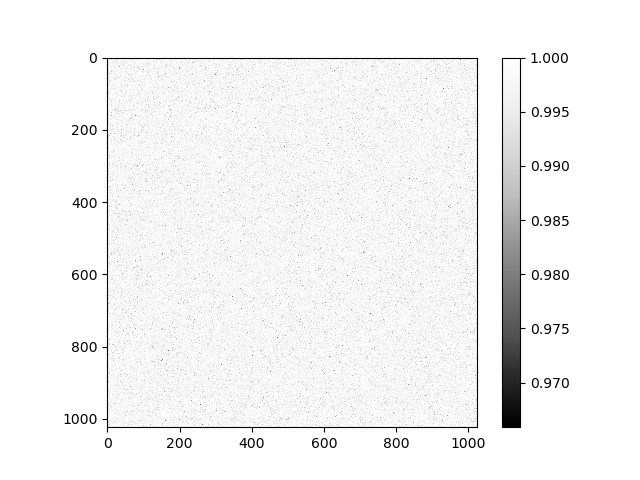
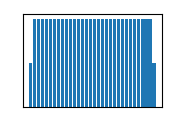

In [3]:
blurred_device = cle.gaussian_blur(dask_array)
blurred_device

Manage the GPU array with Dask

In [4]:
blurred_device_dask = array.from_array(blurred_device)
blurred_device_dask

dask.array<array, shape=(450, 1024, 1024), dtype=float32, chunksize=(322, 322, 322), chunktype=numpy.ndarray>

Data pulling from device to host need to be operated manually. Collect result back to host before releasing GPU memory.

In [5]:
blurred_host = array.from_array(blurred_device) # pull gpu array back to host then manage by dask
blurred_host

dask.array<array, shape=(450, 1024, 1024), dtype=float32, chunksize=(322, 322, 322), chunktype=numpy.ndarray>

Release GPU memory. Carefully using the buffer release, it must come with the variable deletion to avoid kernel crash due to invalid memory pointer.

In [6]:
# good practice to remove the variables for releasing the gpu memory
del blurred_device 
del blurred_device_dask

To know more on how to use dask and pyclesperanto together for multi-device tile processing approach, see [this notebook example](../examples/multi-gpu_tile_processing_with_dask.ipynb).